In [1]:
import pandas as pd
df = pd.read_csv("meal.csv")
df.head()

,profession,breakfast,lunch,dinner,result
0,Job,y,n,y,no
1,Job,y,n,y,no
2,Student,y,y,y,yes
3,Student,y,y,y,yes
4,Student,y,y,y,yes


In [2]:
inputs = df.drop('result', axis = 'columns')
target = df['result']

In [3]:
inputs.head()

,profession,breakfast,lunch,dinner
0,Job,y,n,y
1,Job,y,n,y
2,Student,y,y,y
3,Student,y,y,y
4,Student,y,y,y


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
new_profession = LabelEncoder()
new_breakfast = LabelEncoder()
new_lunch = LabelEncoder()
new_dinner = LabelEncoder()
new_d = LabelEncoder()

In [6]:
inputs['profession_n'] = new_profession.fit_transform(inputs['profession'])
inputs['breakfast_n'] = new_breakfast.fit_transform(inputs['breakfast'])
inputs['lunch_n'] = new_lunch.fit_transform(inputs['lunch'])
inputs['dinner_n'] = new_dinner.fit_transform(inputs['dinner'])
inputs.head()

,profession,breakfast,lunch,dinner,profession_n,breakfast_n,lunch_n,dinner_n
0,Job,y,n,y,0,0,0,0
1,Job,y,n,y,0,0,0,0
2,Student,y,y,y,1,0,1,0
3,Student,y,y,y,1,0,1,0
4,Student,y,y,y,1,0,1,0


In [7]:
inputs_n = inputs.drop(['profession', 'breakfast', 'lunch', 'dinner'], axis = 'columns')

In [8]:
inputs_n.head()

,profession_n,breakfast_n,lunch_n,dinner_n
0,0,0,0,0
1,0,0,0,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [9]:
from sklearn import tree

In [10]:
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(inputs_n, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
from sklearn import metrics,model_selection
from IPython.display import Image, display
import matplotlib.pyplot as plt,pydotplus

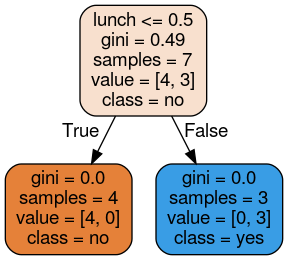

In [13]:
ddata=tree.export_graphviz(model,out_file=None,filled=True,rounded=True,
                          feature_names=['profession','breakfast','lunch','dinner'],
                          class_names=['no','yes'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))